### Import Libraries

In [26]:
import tensorflow.keras.datasets as data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

### Load data

In [2]:
fashion = data.fashion_mnist

## Split data into training and testing

In [3]:
(train_images, train_labels), (test_images,test_labels)  = fashion.load_data()

### Class Label

In [16]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Display images

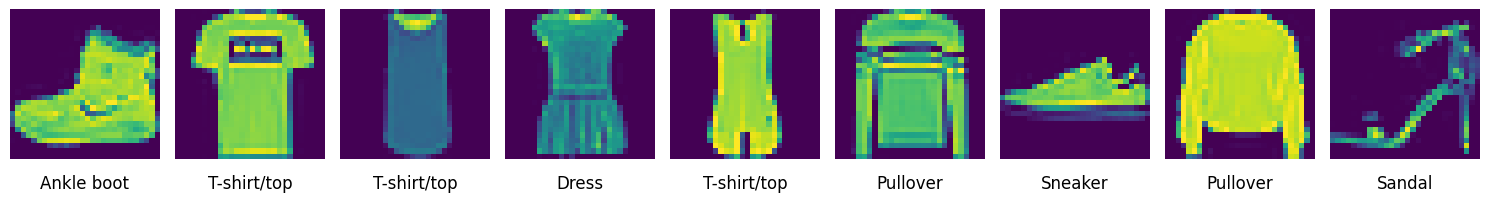

In [18]:
num_images = 9  # Number of images to display
plt.figure(figsize=(15, 5))  # Set figure size

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)  # 1 row, num_images columns
    plt.imshow(train_images[i])
    plt.axis('off')  # Hide axis
    
    # Display the label below the image
    plt.text(0.5, -0.1, class_names[train_labels[i]], ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Display grayscale images

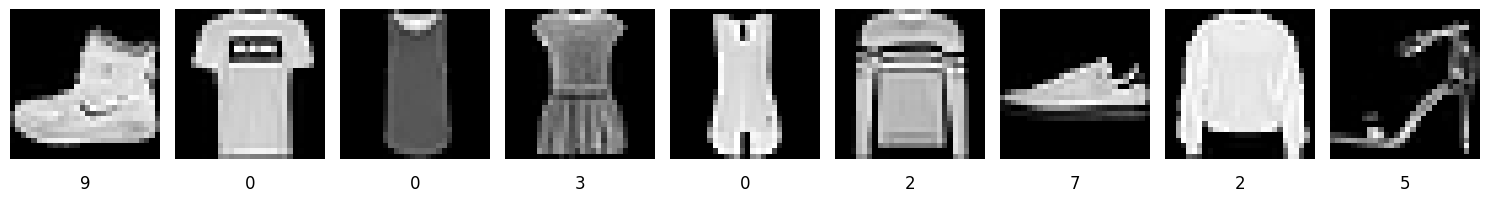

In [5]:
num_images = 9  # Number of images to display
plt.figure(figsize=(15, 5))  # Set figure size

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)  # 1 row, num_images columns
    plt.imshow(train_images[i], cmap='gray')  # Use the 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis
    
    # Display the label below the image
    plt.text(0.5, -0.1, str(train_labels[i]), ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Normalize the images

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Built model

In [7]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

### Compile the model

In [8]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Implement callbacks

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.90): # It cancel the training when model reach 90% accuracy
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [10]:
model.fit(train_images, train_labels, epochs=40, callbacks=callbacks)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7784 - loss: 0.6335
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8611 - loss: 0.3887
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8783 - loss: 0.3379
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8846 - loss: 0.3138
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8901 - loss: 0.2937
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8979 - loss: 0.2766
Epoch 7/40
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9030 - loss: 0.2634
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9030 - loss: 0.2634


### Evaluate model

In [11]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8813 - loss: 0.3398


[0.3396821916103363, 0.879800021648407]

### Predict images

In [12]:
x_predict = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### Compare b/w actual and predicted

In [24]:
def compare_test(index):
    predicted_label = np.argmax(x_predict[index])
    print("Actual Value is ", test_labels[index], " ", "Predicted Value is ", predicted_label)

In [25]:
for i in range (90, 99):
    compare_test(i)

Actual Value is  5   Predicted Value is  5
Actual Value is  3   Predicted Value is  3
Actual Value is  6   Predicted Value is  6
Actual Value is  7   Predicted Value is  7
Actual Value is  1   Predicted Value is  1
Actual Value is  8   Predicted Value is  8
Actual Value is  0   Predicted Value is  0
Actual Value is  1   Predicted Value is  1
Actual Value is  4   Predicted Value is  4


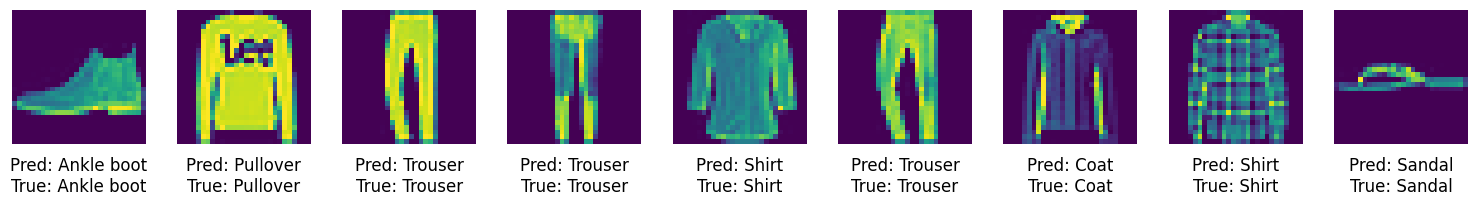

In [21]:
# Display predictions for the first 9 images
num_images = 9
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')

    # Get the predicted class
    predicted_label = np.argmax(x_predict[i])
    true_label = test_labels[i]

    plt.text(0.5, -0.1, f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}',
             ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)

plt.tight_layout()

### Save the model

In [28]:
# Create the directory if it does not exist
if not os.path.exists('model'):
    os.mkdir('model')

In [31]:
# Save the model in the directory
model.save(os.path.join('model', 'my_model.keras'))

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(_, _), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Set the directory to save the images
save_dir = 'random_images'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# Randomly select 100 indices
num_images = 100
random_indices = np.random.choice(len(test_images), size=num_images, replace=False)

# Save the randomly selected images
for i, index in enumerate(random_indices):
    image = test_images[index]
    label = class_names[test_labels[index]]
    
    # Save the image
    plt.imsave(os.path.join(save_dir, f'image_{i+1}_{label}.png'), image)

print(f'Saved {num_images} random images to the "{save_dir}" directory.')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Mansoor\\Music\\fashion-mnist-prediction\\random_images\\image_8_T-shirt\\top.png'